# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [10]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Тинькофф ML/creditcard.csv')

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop('Class', axis=1))
X_scaled = scaler.transform(data.drop('Class', axis=1))
y_scaled = data.Class

In [15]:
y_scaled.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Видим, что классы крайне не сбалансированы. Попробуем нагенерировать новые данные для наименьшего класса, а больший класс немного почистить

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE({1: 20000})
X_sm, y_sm = sm.fit_resample(X_scaled, y_scaled)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={1: 20000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [17]:
X_sm, y_sm = pd.DataFrame(X_sm).tail(60000), pd.DataFrame(y_sm).tail(60000)

In [18]:
y_sm.value_counts()

Class
0        40446
1        19554
dtype: int64

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [19]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

In [29]:
# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)
# PS: Через SMOTE точность почти везде 99%

In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
GBC = GradientBoostingClassifier()

estimators = [logreg, knn, GBC, 'Const']
acc_scores = []
roc_auc_scores = []
prec = []

for estimator in estimators:
  if estimator == 'Const':
    y_pred = np.zeros(len(y_test))
  else:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
  acc_scores.append(accuracy_score(y_test, y_pred))
  roc_auc_scores.append(roc_auc_score(y_test, y_pred))
  prec.append(precision_recall_fscore_support(y_test, y_pred))
  #scores.append(np.mean(cross_val_score(estimator, X_sm, y_sm, scoring='accuracy', verbose=10, cv=3)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i in range(4):
  print(estimators[i], '\nAccuracy:', acc_scores[i], '\nRoc_auc:', roc_auc_scores[i], '\nPrecision:', prec[i][0], '\nRecall:', prec[i][1], '\nF1_score:', prec[i][2], '\n')

LogisticRegression() 
Accuracy: 0.9992556388865481 
Roc_auc: 0.85883368231965 
Precision: [0.99953585 0.80769231] 
Recall: [0.99971865 0.71794872] 
F1_score: [0.99962724 0.760181  ] 

KNeighborsClassifier() 
Accuracy: 0.9996348417179293 
Roc_auc: 0.9059547706519642 
Precision: [0.99969059 0.95959596] 
Recall: [0.99994373 0.81196581] 
F1_score: [0.99981714 0.87962963] 

GradientBoostingClassifier() 
Accuracy: 0.9984550995758547 
Roc_auc: 0.5683127638814492 
Precision: [0.998581 0.64    ] 
Recall: [0.99987339 0.13675214] 
F1_score: [0.99922678 0.22535211] 

Const 
Accuracy: 0.9983567877306817 
Roc_auc: 0.5 
Precision: [0.99835679 0.        ] 
Recall: [1. 0.] 
F1_score: [0.99917772 0.        ] 



In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict_proba(X_test)[:, 1]

In [ ]:
pd.DataFrame(y_pred).value_counts()

0.000143    4
0.000055    4
0.000400    4
0.000055    4
0.000438    3
           ..
0.000100    1
0.000100    1
0.000100    1
0.000100    1
1.000000    1
Length: 71104, dtype: int64

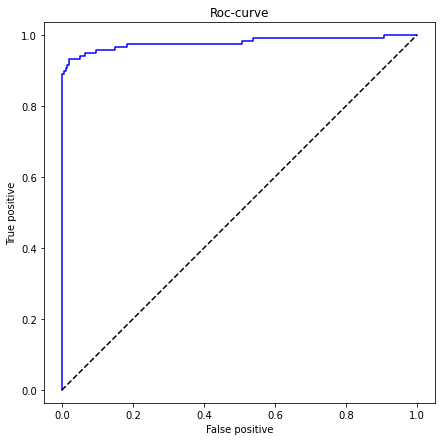

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.axis('Equal')
plt.title('Roc-curve')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

$precision = tp / (tp + fp)$

$recall = tp / (tp + fn)$

Нам надо максимизировать $tp$ и минимизировать $fp$. Поэтому нам надо минимизировать $precision$

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [33]:
# Можно конечно GridSearch использовать, но на курсе его пока вроде не трогали
from sklearn.metrics import precision_score
scores = []
for C in np.linspace(0.001, 0.3, 5):
  logreg = LogisticRegression(C = C)
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  scores.append((C, precision_score(y_test, y_pred)))
scores

[(0.001, 0.9016393442622951),
 (0.07575, 0.9156626506024096),
 (0.1505, 0.9135802469135802),
 (0.22525, 0.9135802469135802),
 (0.3, 0.9135802469135802)]

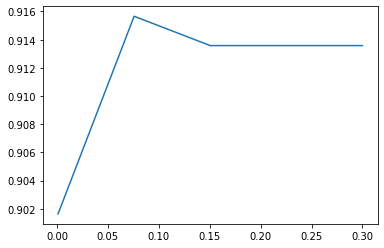

In [34]:
import matplotlib.pyplot as plt
plt.plot([x[0] for x in scores], [x[1] for x in scores])

Точность максимальная при С = 0.08

In [35]:
scores = []
for iters in np.linspace(100, 30000, 5):
  logreg = LogisticRegression(max_iter = iters, C = 0.08)
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  scores.append((iters, precision_score(y_test, y_pred)))
scores

[(100.0, 0.9156626506024096),
 (7575.0, 0.9156626506024096),
 (15050.0, 0.9156626506024096),
 (22525.0, 0.9156626506024096),
 (30000.0, 0.9156626506024096)]

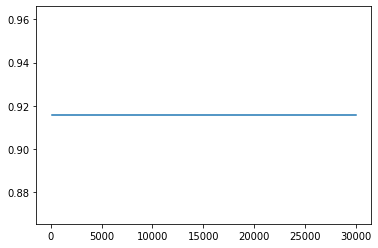

In [36]:
plt.plot([x[0] for x in scores], [x[1] for x in scores])

Количество итераций не влияет на точность, что конечно достаточно странно...
Рекорд для логистической регрессии $precision = 0.9156626506024096$

In [37]:
scores = []
for n in np.linspace(3, 9, 3):
  knn = KNeighborsClassifier(n_neighbors=int(n))
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append((n, precision_score(y_test, y_pred)))
scores

[(3.0, 0.9339622641509434),
 (6.0, 0.9223300970873787),
 (9.0, 0.912621359223301)]

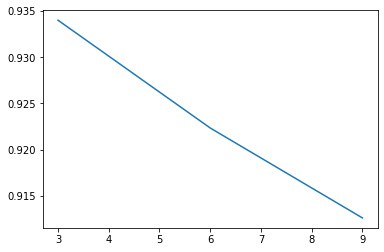

In [38]:
plt.plot([x[0] for x in scores], [x[1] for x in scores])

Лучший результат при количестве соседей = 3. Меньше ставить уже нецелесообразно

In [39]:
scores = []
for leaf in np.linspace(10, 100, 4):
  knn = KNeighborsClassifier(leaf_size=leaf, n_neighbors=3)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append((leaf, precision_score(y_test, y_pred)))
scores

[(10.0, 0.9339622641509434),
 (40.0, 0.9339622641509434),
 (70.0, 0.9339622641509434),
 (100.0, 0.9339622641509434)]

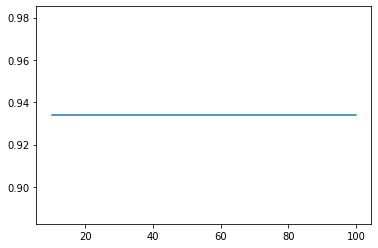

In [40]:
plt.plot([x[0] for x in scores], [x[1] for x in scores])

И опять точность не меняется

В итоге лучшей моделью оказался $KNeighborsClassifier$ с параметрами $n\_neighbors=3, leaf\_size$ - любой. 

$Precision = 0.9339622641509434$

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [ ]:
# train.Work_Experience = train.Work_Experience.fillna(int(train.Work_Experience.mean()))
# test.Work_Experience = test.Work_Experience.fillna(int(test.Work_Experience.mean()))
# train.Family_Size = train.Family_Size.fillna(int(train.Family_Size.mean()))
# test.Family_Size = test.Family_Size.fillna(int(test.Family_Size.mean()))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
train = train.dropna()
test = test.dropna()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB


In [ ]:
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

In [ ]:
train.Gender = np.where(train.Gender == 'Male', 0, train.Gender)
train.Gender = np.where(train.Gender == 'Female', 1, train.Gender)
train.Ever_Married = np.where(train.Ever_Married == 'No', 0, train.Ever_Married)
train.Ever_Married = np.where(train.Ever_Married == 'Yes', 1, train.Ever_Married)
train.Graduated = np.where(train.Graduated == 'No', 0, train.Graduated)
train.Graduated = np.where(train.Graduated == 'Yes', 1, train.Graduated)

In [ ]:
test.Gender = np.where(test.Gender == 'Male', 0, test.Gender)
test.Gender = np.where(test.Gender == 'Female', 1, test.Gender)
test.Ever_Married = np.where(test.Ever_Married == 'No', 0, test.Ever_Married)
test.Ever_Married = np.where(test.Ever_Married == 'Yes', 1, test.Ever_Married)
test.Graduated = np.where(test.Graduated == 'No', 0, test.Graduated)
test.Graduated = np.where(test.Graduated == 'Yes', 1, test.Graduated)

In [ ]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D
2,1,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B
3,0,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B
5,0,1,56,0,Artist,0.0,Average,2.0,Cat_6,C
6,0,0,32,1,Healthcare,1.0,Low,3.0,Cat_6,C


In [ ]:
test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,1,36,1,Engineer,0.0,Low,1.0,Cat_6,B
1,0,1,37,1,Healthcare,8.0,Average,4.0,Cat_6,A
3,0,1,59,0,Executive,11.0,High,2.0,Cat_6,B
5,0,1,47,1,Doctor,0.0,High,5.0,Cat_4,C
6,0,1,61,1,Doctor,5.0,Low,3.0,Cat_6,D


In [ ]:
train_encoded = pd.get_dummies(train, columns=['Profession', 'Spending_Score', 'Var_1'])
train_encoded.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,0,22,0,1.0,4.0,D,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,1,67,1,1.0,1.0,B,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0,1,67,1,0.0,2.0,B,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,1,56,0,0.0,2.0,C,1,0,0,...,1,0,0,0,0,0,0,0,1,0
6,0,0,32,1,1.0,3.0,C,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
test_encoded = pd.get_dummies(test, columns=['Profession', 'Spending_Score', 'Var_1'])
test_encoded.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,1,36,1,0.0,1.0,B,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,1,37,1,8.0,4.0,A,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,59,0,11.0,2.0,B,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,1,47,1,0.0,5.0,C,0,1,0,...,0,1,0,0,0,0,1,0,0,0
6,0,1,61,1,5.0,3.0,D,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    6665 non-null   object 
 1   Ever_Married              6665 non-null   object 
 2   Age                       6665 non-null   int64  
 3   Graduated                 6665 non-null   object 
 4   Work_Experience           6665 non-null   float64
 5   Family_Size               6665 non-null   float64
 6   Segmentation              6665 non-null   object 
 7   Profession_Artist         6665 non-null   uint8  
 8   Profession_Doctor         6665 non-null   uint8  
 9   Profession_Engineer       6665 non-null   uint8  
 10  Profession_Entertainment  6665 non-null   uint8  
 11  Profession_Executive      6665 non-null   uint8  
 12  Profession_Healthcare     6665 non-null   uint8  
 13  Profession_Homemaker      6665 non-null   uint8  
 14  Professi

In [ ]:
train_encoded.Gender = train_encoded.Gender.astype(int)
train_encoded.Ever_Married = train_encoded.Ever_Married.astype(int)
train_encoded.Graduated = train_encoded.Graduated.astype(int)
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    6665 non-null   int64  
 1   Ever_Married              6665 non-null   int64  
 2   Age                       6665 non-null   int64  
 3   Graduated                 6665 non-null   int64  
 4   Work_Experience           6665 non-null   float64
 5   Family_Size               6665 non-null   float64
 6   Segmentation              6665 non-null   object 
 7   Profession_Artist         6665 non-null   uint8  
 8   Profession_Doctor         6665 non-null   uint8  
 9   Profession_Engineer       6665 non-null   uint8  
 10  Profession_Entertainment  6665 non-null   uint8  
 11  Profession_Executive      6665 non-null   uint8  
 12  Profession_Healthcare     6665 non-null   uint8  
 13  Profession_Homemaker      6665 non-null   uint8  
 14  Professi

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_encoded.Age = scaler.fit_transform(train_encoded.Age.values.reshape(-1, 1))
test_encoded.Age = scaler.fit_transform(test_encoded.Age.values.reshape(-1, 1))

In [ ]:
# X_train = train_encoded.drop('Segmentation', axis=1)
# y_train = train_encoded.Segmentation
# X_test = test_encoded.drop('Segmentation', axis=1)
# y_test = test_encoded.Segmentation

In [ ]:
data = pd.concat([train_encoded, test_encoded], axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Segmentation', axis=1), data['Segmentation'])

In [ ]:
X_train.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
267,1,1,1.722704,1,0.0,3.0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2414,0,0,-1.101651,0,8.0,4.0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2965,1,0,-1.061326,1,9.0,8.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4268,1,0,-0.698191,0,1.0,6.0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1936,1,0,-0.637669,1,5.0,2.0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
GBC = GradientBoostingClassifier()

estimators = [logreg, knn, GBC, 'Const']
acc_scores = []
prec = []

for estimator in estimators:
  if estimator == 'Const':
    y_pred = np.zeros(len(y_test))
    y_pred = np.where(y_pred == 0, 'A', y_pred)
  else:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
  acc_scores.append(accuracy_score(y_test, y_pred))
  prec.append(precision_recall_fscore_support(y_test, y_pred, average='macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i in range(4):
  print(estimators[i], '\nAccuracy:', acc_scores[i], '\nPrecision:', prec[i][0], '\nRecall:', prec[i][1], '\nF1-Score:', prec[i][2],'\n')

LogisticRegression() 
Accuracy: 0.48480725623582765 
Precision: 0.47227063409781944 
Recall: 0.4796157670456803 
F1-Score: 0.461899710049659 

KNeighborsClassifier() 
Accuracy: 0.42086167800453517 
Precision: 0.4217900161180601 
Recall: 0.41734832375820163 
F1-Score: 0.41773401627567364 

GradientBoostingClassifier() 
Accuracy: 0.4929705215419501 
Precision: 0.48415779179662854 
Recall: 0.48904428374104897 
F1-Score: 0.48331210216576515 

Const 
Accuracy: 0.26258503401360545 
Precision: 0.06564625850340136 
Recall: 0.25 
F1-Score: 0.10398706896551725 



In [ ]:
data.Segmentation.value_counts()

D    2388
A    2308
C    2101
B    2022
Name: Segmentation, dtype: int64

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Классы сбалансированы, поэтому будем максимизировать $accuracy$

In [ ]:
from sklearn.metrics import accuracy_score
scores = []
for iters in np.linspace(100, 1000, 5):
  logreg = LogisticRegression(max_iter = iters)
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  scores.append((iters, accuracy_score(y_test, y_pred)))
scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[(100.0, 0.48480725623582765),
 (325.0, 0.4857142857142857),
 (550.0, 0.4857142857142857),
 (775.0, 0.4857142857142857),
 (1000.0, 0.4857142857142857)]

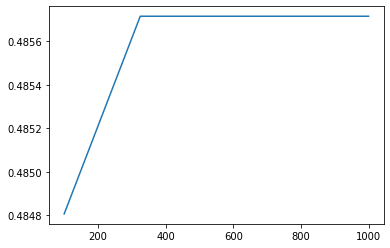

In [ ]:
import matplotlib.pyplot as plt
plt.plot([x[0] for x in scores], [x[1] for x in scores])

300 итераций - наилучший результат, дальше не меняется

In [ ]:
scores = []
for C in np.linspace(0.1, 20, 8):
  logreg = LogisticRegression(C = C, max_iter=300)
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  scores.append((C, accuracy_score(y_test, y_pred)))
scores

[(0.1, 0.4834467120181406),
 (2.9428571428571426, 0.4857142857142857),
 (5.785714285714285, 0.48616780045351476),
 (8.628571428571428, 0.48616780045351476),
 (11.47142857142857, 0.48616780045351476),
 (14.314285714285711, 0.48616780045351476),
 (17.15714285714286, 0.48616780045351476),
 (20.0, 0.48616780045351476)]

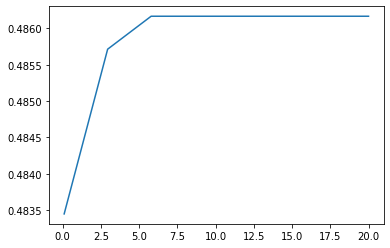

In [ ]:
plt.plot([x[0] for x in scores], [x[1] for x in scores])

Лучшая $accuracy$ у LogisticRegression при $C = 5.8, max\_iter=300$ 

Она равна $0.48616780045351476$

In [ ]:
scores = []
for leaf in np.linspace(5, 100, 5):
  knn = KNeighborsClassifier(leaf_size=leaf)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append((leaf, accuracy_score(y_test, y_pred)))
scores

[(5.0, 0.42086167800453517),
 (28.75, 0.42086167800453517),
 (52.5, 0.42086167800453517),
 (76.25, 0.42086167800453517),
 (100.0, 0.42086167800453517)]

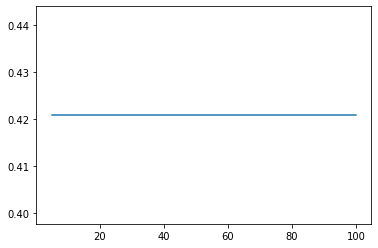

In [ ]:
plt.plot([x[0] for x in scores], [x[1] for x in scores])

leaf_size не влияет нашу метрику

In [ ]:
scores = []
for n in np.linspace(3, 24, 8):
  knn = KNeighborsClassifier(n_neighbors=int(n))
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append((n, accuracy_score(y_test, y_pred)))
scores

[(3.0, 0.4222222222222222),
 (6.0, 0.42993197278911566),
 (9.0, 0.44625850340136053),
 (12.0, 0.4417233560090703),
 (15.0, 0.45714285714285713),
 (18.0, 0.46077097505668935),
 (21.0, 0.4671201814058957),
 (24.0, 0.4616780045351474)]

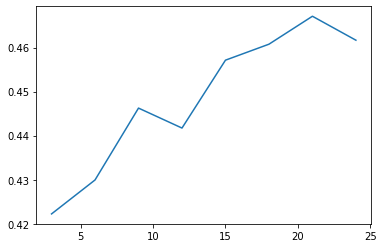

In [ ]:
plt.plot([x[0] for x in scores], [x[1] for x in scores])

Для $KNeighborsClassifier$ лучшая $accuracy - 
0.4671201814058957$ 

Оптимальное количество соседей - 21. 

In [ ]:
scores = []
for lr in np.linspace(0.01, 0.7, 5):
  gbc = GradientBoostingClassifier(learning_rate=lr)
  gbc.fit(X_train, y_train)
  y_pred = gbc.predict(X_test)
  scores.append((lr, accuracy_score(y_test, y_pred)))
scores

[(0.01, 0.48435374149659866),
 (0.1825, 0.48662131519274376),
 (0.355, 0.4766439909297052),
 (0.5275, 0.47528344671201816),
 (0.7, 0.46984126984126984)]

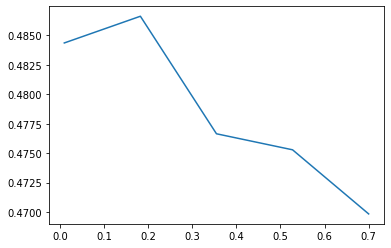

In [ ]:
plt.plot([x[0] for x in scores], [x[1] for x in scores])

$learning\_rate = 0.18 - topchik$

In [ ]:
scores = []
for n in np.linspace(50, 550, 6):
  gbc = GradientBoostingClassifier(learning_rate=0.18, n_estimators=int(n))
  gbc.fit(X_train, y_train)
  y_pred = gbc.predict(X_test)
  scores.append((n, accuracy_score(y_test, y_pred)))
scores

[(50.0, 0.49115646258503404),
 (150.0, 0.48480725623582765),
 (250.0, 0.4820861678004535),
 (350.0, 0.47619047619047616),
 (450.0, 0.47528344671201816),
 (550.0, 0.4684807256235828)]

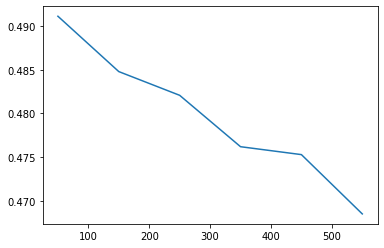

In [ ]:
plt.plot([x[0] for x in scores], [x[1] for x in scores])

$n\_estimators=50 - best$, меньше ставить не целесообразно

In [ ]:
scores = []
for depth in np.linspace(2, 8, 4):
  gbc = GradientBoostingClassifier(learning_rate=0.18, n_estimators=50, max_depth=depth)
  gbc.fit(X_train, y_train)
  y_pred = gbc.predict(X_test)
  scores.append((depth, accuracy_score(y_test, y_pred)))
scores

[(2.0, 0.4943310657596372),
 (4.0, 0.4961451247165533),
 (6.0, 0.47573696145124716),
 (8.0, 0.4616780045351474)]

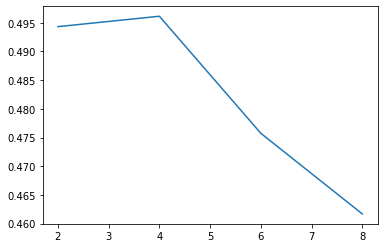

In [ ]:
plt.plot([x[0] for x in scores], [x[1] for x in scores])

$GradientBoostingClassifier$ показал лучшую точность $0.4961451247165533$ при параметрах $learning\_rate=0.18, n\_estimators=50, max\_depth=4$

GradientBoostingClassifier показал наибольшую точность $0.496$, однако я расчитывал получить большую точность. Потом зашёл на кагл и понял, что у меня получилась очень хорошая точность, так как у остальных она получалась 0.52 в среднем. Похоже, что это прямо реальные данные, которые не сильно влияют на целевую переменную. В целом, результатами я доволен)